### Analiza danych w języku Julia

Plan

- podstawowe funkcje wejścia, wyjścia
- praca  z plikami
- praca z plikami csv
- pakiet DataFrames
- wizualizacja za pomocą pakietu Gadfly
- zbiory danych w RDatasets
- przykłady analizy danych

Część przykładów pochodzi  z książek :
- Julia High Performance by Avik Sengupta (120 pages; published: 2016-05; ISBN: 9781785880919) T
- Mastering Julia by Malcolm Sherrington - published by Packt Publishing (410 pages; published: 2015-07; ISBN: 9781783553310)
- Getting Started with Julia Programming by Ivo Balbaert - published by Packt Publishing (214 pages; published: 2015-02-28; ISBN: 9781783284795)

### Podstawowe wejście, wyjście 

- Julia widzi dane jako strumień bajtów
- podstawowymi funkcjami są read() oraz write(), które operują na binarnym I/O
- nad tymi funkcjami są zaimplementowane bardziej wygodne funkcje wyższego poziomu.
- Julia operuje na strumieniach wejścia (STDIN), wyjścia (STDOUT) oraz błędu (STDERR) 


#### Przykłady działania funkcji read  w terminalu Julii

Funkcja nie  działa w Jupiterze,.

```bash

julia> read(STDIN,Char)
a
'a'

julia> read(STDIN, 8)
12345678
8-element Array{UInt8,1}:
 0x31
 0x32
 0x33
 0x34
 0x35
 0x36
 0x37
 0x38


julia> read(STDIN,UInt32)
1234
0x34333231


julia> read(STDIN,Int32)
1234
875770417


julia> hex(875770417)
"34333231"

```

In [111]:
# readline() oraz readline(STDIN)otwierają  STDIN> prompt widget w Jupiterze
# W Julii można użyć też czytania znaków poprzez funkcję read() - nie działa w Jupiterze

readline()

STDIN> hello!


"hello!"

In [2]:
#funkcja write() wypisuje zawartość binarnego strumienia, zwraca liczbę bytów STDOUT
#np. 0x61 - heksadecymalny kod "a" pamiętany w UInt8
write(STDOUT, 0x61)

a

1

In [3]:
typeof(0x61)

UInt8

In [4]:
typeof(97)

Int64

In [5]:
# dziesiatkowy kod "a" pamiętany w Int64
write(STDOUT, 97)

a       

8

In [6]:
#dodanie ";" powoduje, że funkcja nic nie zwraca
write(STDOUT, 0x62);

b

In [7]:
# dla stringów 
write(STDOUT, "abcd")

abcd

4

In [8]:
# do tekstowego IO można  użyć wysokopoziomowego  print
print(STDOUT,0x61)

97

### Pliki

Do pracy z plikami uzywamy typu IOStream

In [9]:
f = open("hello.txt")

IOStream(<file hello.txt>)

In [10]:
#Typ IOStream
fieldnames(f)

4-element Array{Symbol,1}:
 :handle
 :ios   
 :name  
 :mark  

In [11]:
# wskaźnik do obiektu pliku
f.handle

Ptr{Void} @0x00007f70ee5127b0

In [12]:
# nazwa pliku
f.name

"<file hello.txt>"

In [13]:
# można wczytać zawartość plików do tablicy Array
data1=readlines(f)

8-element Array{String,1}:
 "I say high, you say low.\n"                                     
 "You say why and I say I don't know, oh no.\n"                   
 "You say goodbye and I say hello\n"                              
 "(Hello goodbye hello goodbye) hello hello\n"                    
 "(Hello goodbye) I don't know why you say goodbye, I say hello\n"
 "(Hello goodbye hello goodbye) hello hello\n"                    
 "(Hello goodbye) I don't know why you say goodbye\n"             
 "(Hello goodbye) I say hello. \n"                                

In [14]:
# czytanie z wczytanej wcześniej struktury danych typu Array 
for line in data1
    println(line)
end

I say high, you say low.

You say why and I say I don't know, oh no.

You say goodbye and I say hello

(Hello goodbye hello goodbye) hello hello

(Hello goodbye) I don't know why you say goodbye, I say hello

(Hello goodbye hello goodbye) hello hello

(Hello goodbye) I don't know why you say goodbye

(Hello goodbye) I say hello. 



In [15]:
# należy pamiętać o zamknięciu pliku po użyciu, aby zwolnić zasoby
close(f)

### Wygodna składnia z automatycznym zamknięciem pliku po wyjściu z pętli
```julia
open("hello.txt") do file
 # przetwarzanie pliku
 process(file)
   
end ```
albo można podać nazwe funkcji przetwarzającej jako parametr:
```julia
open(process, "hello.txt")
```

In [112]:
#przykład - przetwarza plik linia po linii
open("hello.txt") do file
 for line in eachline(file)
        print(line)
    end
end


I say high, you say low.
You say why and I say I don't know, oh no.
You say goodbye and I say hello
(Hello goodbye hello goodbye) hello hello
(Hello goodbye) I don't know why you say goodbye, I say hello
(Hello goodbye hello goodbye) hello hello
(Hello goodbye) I don't know why you say goodbye
(Hello goodbye) I say hello. 


In [17]:
function read_and_capitalize(f::IOStream)
    return uppercase(readstring(f))
end

read_and_capitalize (generic function with 1 method)

In [18]:
# funkcji open można też użyć bez składni do, podając nazwę funkcji przetwarzającej (tutaj read_and_capitalize())
open(read_and_capitalize, "hello.txt")

"I SAY HIGH, YOU SAY LOW.\nYOU SAY WHY AND I SAY I DON'T KNOW, OH NO.\nYOU SAY GOODBYE AND I SAY HELLO\n(HELLO GOODBYE HELLO GOODBYE) HELLO HELLO\n(HELLO GOODBYE) I DON'T KNOW WHY YOU SAY GOODBYE, I SAY HELLO\n(HELLO GOODBYE HELLO GOODBYE) HELLO HELLO\n(HELLO GOODBYE) I DON'T KNOW WHY YOU SAY GOODBYE\n(HELLO GOODBYE) I SAY HELLO. \n"

In [19]:
#otwieranie pliku do zapisu za pomocą flagi "w" - uwaga - kasuje poprzednią zawartość pliku!
fname ="example2.dat"
f2= open(fname, "w")

IOStream(<file example2.dat>)

In [20]:
write(f2, "I write to a file \n")

19

In [21]:
println(f2,"even with println!")
# jeśli podglądniemy plik, nic w nim nie zostanie zapisane, dopóki go nie zamkniemy 

In [22]:
close(f2)

In [23]:
# dodawanie do pliku
fname ="example3.dat"
f2= open(fname, "a")

IOStream(<file example3.dat>)

In [24]:
write(f2, "I write to a file \n")

19

In [25]:
close(f2)

### Obsługa plików csv
- csv - comma-separated file 
- dane odseparowane "," albo ";"
- de facto standard dla małych i średnich danych w formie tabel
- każda linijka zawiera dane o jednym obiekcie

In [26]:
# wczytanie danych z pliku za pomocą funkcji readdlm do wielowymiarowej tablicy  typów Any
fname="winequality.csv"
# https://docs.julialang.org/en/stable/stdlib/io-network/#Base.readdlm
data10=readdlm(fname, ';')

1600×12 Array{Any,2}:
   "fixed acidity"   "volatile acidity"  …    "alcohol"   "quality"
  7.4               0.7                      9.4         5         
  7.8               0.88                     9.8         5         
  7.8               0.76                     9.8         5         
 11.2               0.28                     9.8         6         
  7.4               0.7                  …   9.4         5         
  7.4               0.66                     9.4         5         
  7.9               0.6                      9.4         5         
  7.3               0.65                    10           7         
  7.8               0.58                     9.5         7         
  7.5               0.5                  …  10.5         5         
  6.7               0.58                     9.2         5         
  7.5               0.5                     10.5         5         
  ⋮                                      ⋱   ⋮                     
  5.8               0.61  

In [27]:
# podajemy nazwę pliku, separator, typ danych (może być numeryczny, string lub Any), 
#line separator, czy traktować pierwszą linię jako nagłówek

data3=readdlm(fname, ';', Float64, '\n', header=true)

(
[7.4 0.7 … 9.4 5.0; 7.8 0.88 … 9.8 5.0; … ; 5.9 0.645 … 10.2 5.0; 6.0 0.31 … 11.0 6.0],

AbstractString["fixed acidity" "volatile acidity" … "alcohol" "quality"])

In [28]:
typeof(data3)

Tuple{Array{Float64,2},Array{AbstractString,2}}

In [29]:
#nagłówek
data3[2]

1×12 Array{AbstractString,2}:
 "fixed acidity"  "volatile acidity"  …  "sulphates"  "alcohol"  "quality"

In [30]:
# dane
data3[1]

1599×12 Array{Float64,2}:
  7.4  0.7    0.0   1.9  0.076  11.0   34.0  0.9978   3.51  0.56   9.4  5.0
  7.8  0.88   0.0   2.6  0.098  25.0   67.0  0.9968   3.2   0.68   9.8  5.0
  7.8  0.76   0.04  2.3  0.092  15.0   54.0  0.997    3.26  0.65   9.8  5.0
 11.2  0.28   0.56  1.9  0.075  17.0   60.0  0.998    3.16  0.58   9.8  6.0
  7.4  0.7    0.0   1.9  0.076  11.0   34.0  0.9978   3.51  0.56   9.4  5.0
  7.4  0.66   0.0   1.8  0.075  13.0   40.0  0.9978   3.51  0.56   9.4  5.0
  7.9  0.6    0.06  1.6  0.069  15.0   59.0  0.9964   3.3   0.46   9.4  5.0
  7.3  0.65   0.0   1.2  0.065  15.0   21.0  0.9946   3.39  0.47  10.0  7.0
  7.8  0.58   0.02  2.0  0.073   9.0   18.0  0.9968   3.36  0.57   9.5  7.0
  7.5  0.5    0.36  6.1  0.071  17.0  102.0  0.9978   3.35  0.8   10.5  5.0
  6.7  0.58   0.08  1.8  0.097  15.0   65.0  0.9959   3.28  0.54   9.2  5.0
  7.5  0.5    0.36  6.1  0.071  17.0  102.0  0.9978   3.35  0.8   10.5  5.0
  5.6  0.615  0.0   1.6  0.089  16.0   59.0  0.9943   3.58  0.

In [31]:
#trzeci wiersz dot danych jednego z rodzajów wina
row3=data3[1][3,:]

12-element Array{Float64,1}:
  7.8  
  0.76 
  0.04 
  2.3  
  0.092
 15.0  
 54.0  
  0.997
  3.26 
  0.65 
  9.8  
  5.0  

In [32]:
# kolumna dot kwasu cytrynowego w każdym z rodzajów wina
col3=data3[1][:,3]

1599-element Array{Float64,1}:
 0.0 
 0.0 
 0.04
 0.56
 0.0 
 0.0 
 0.06
 0.0 
 0.02
 0.36
 0.08
 0.36
 0.0 
 ⋮   
 0.11
 0.33
 0.2 
 0.15
 0.09
 0.13
 0.08
 0.08
 0.1 
 0.13
 0.12
 0.47

In [33]:
# definiujemy typ Wino i wczytujemy do niego dane z tablicy:
type Wine
    fixed_acidity::Float64
    volatile_acidity::Float64
    citric_acid::Float64
    residual_sugar::Float64
    chlorides::Float64
    free_sulfur_dioxide::Float64
    total_sulfur_dioxide::Float64
    density::Float64
    pH::Float64
    sulphates::Float64
    alcohol::Float64
    quality::Float64
end   

In [34]:
data4=data3[1]
wine1=Wine(data3[1][1,:]...)

Wine(7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0)

In [35]:
writedlm("partial.dat", data4,';')

In [36]:
# jeśli chcemy namewrować danymi przed zapisem, można użyć schematu z poniższego przykładu.

# przyklad zapisu dziesieciu 3-elementowych krotek o losowych wartościach do pliku csv

fname = "savetuple.csv"
csvfile = open(fname, "w")
#nagłówki
write(csvfile, "ColName A, Colname B, Colname C\n")
for i=1:10
    tup(i)=tuple(rand(Float64,3)...)
    write(csvfile, join(tup(i),","), "\n")
end
close(csvfile)

### DataFrames

- Zaawansowany pakiet do działania na tabelkach nxm danych 
- Podobne do pandas DataFrames w Pythonie albo data.frame w R
- Specjalistyczne funkcje do statystyki
- należy zaistalować pakiety:

```julia
Pkg.add("DataFrames")
Pkg.add("DataArrays")
Pkg.add("RDatasets")```

- DataFrame to rodzaj bazy danych in-memory
- Składa się z kolumn, do których odwołujemy się używając symboli
- Każda z kolumn jest typu DataArrays, który jest  parametryzowany typem przechowywanym w tej kolumnie 
- typ ten może być inny w każdej kolumnie (inaczej niż w dwuwymiarowych tablicach )
- strona pakietu: https://github.com/JuliaStats/DataFrames.jl
- dokumentacja https://dataframesjl.readthedocs.io/en/latest/introduction.html
- http://juliastats.github.io/DataFrames.jl/


In [113]:
# wsparcie dla nieistniejących wartości - NA
# wartość NA, typ NAtype

using DataArrays 
using DataFrames
dv=@data([7,3,NA,5,42])


5-element DataArrays.DataArray{Int64,1}:
  7  
  3  
   NA
  5  
 42  

In [38]:
# NA+4 zwaraca NA
sum(dv)

NA

In [39]:
# Można wstawiać wartość NA
dv[5]=NA

NA

In [40]:
# gdy DataArray zawiera wartość NA nie może być  przekonwertowana do typu Array.
convert(Array, dv)

LoadError: DataArrays.NAException("Cannot convert DataArray with NA's to desired type")

In [41]:
# funkcja drop NA czyli dropna()
sum(dropna(dv))

15

In [42]:
# zamiana wartości NA na inną, którą można już uwzględnić w obliczeniach
repl=-1
sum(convert(Array, dv, repl))

13

In [43]:
using DataFrames
df1=DataFrame()
df1[:MojaKolumna]= 1:4
df1[:Col2]= [e,pi,sqrt(2), 42]
df1[:Col3]= [true,false, true, false]
show(df1)

4×3 DataFrames.DataFrame
│ Row │ MojaKolumna │ Col2    │ Col3  │
├─────┼─────────────┼─────────┼───────┤
│ 1   │ 1           │ 2.71828 │ true  │
│ 2   │ 2           │ 3.14159 │ false │
│ 3   │ 3           │ 1.41421 │ true  │
│ 4   │ 4           │ 42.0    │ false │

In [44]:
typeof(df1[:Col3])

DataArrays.DataArray{Bool,1}

In [45]:
# możemy też utworzyć DataFrame używając konstruktora
df2=DataFrame(MojaKolumna=1:10, 
    Col2=[e,pi, sqrt(2), 3, 4,e,pi, sqrt(2), 3, 4], 
    Col3=[true,true,false,true,false,true,true,false,true,false])

,MojaKolumna,Col2,Col3
1,1,2.718281828459045,true
2,2,3.141592653589793,true
3,3,1.4142135623730951,false
4,4,3.0,true
5,5,4.0,false
6,6,2.718281828459045,true
7,7,3.141592653589793,true
8,8,1.4142135623730951,false
9,9,3.0,true
10,10,4.0,false


In [106]:
# można odwoływać się po indeksie
show(df2[2])

[2.71828,3.14159,1.41421,3.0,4.0,2.71828,3.14159,1.41421,3.0,4.0]

In [47]:
# albo po symbolu kolumny
show(df2[:Col2])

[2.71828,3.14159,1.41421,3.0,4.0,2.71828,3.14159,1.41421,3.0,4.0]

In [48]:
# wiersze lub podzbiory wierszy i kolumn uzyskujemy poprzez operator (:). Wynikiem jest nowy DataFrame
show(df2[3,:])

1×3 DataFrames.DataFrame
│ Row │ MojaKolumna │ Col2    │ Col3  │
├─────┼─────────────┼─────────┼───────┤
│ 1   │ 3           │ 1.41421 │ false │

In [49]:
# drugi i trzeci wiersz
df2[2:3, :]

,MojaKolumna,Col2,Col3
1,2,3.141592653589793,true
2,3,1.4142135623730951,false


In [50]:
# druga kolumna drugiego i trzeciego wiersza
df2[2:3, :Col2]

2-element DataArrays.DataArray{Float64,1}:
 3.14159
 1.41421

In [51]:
# druga i trzecia kolumna drugiego i trzeciego wiersza
df2[2:3,[:Col2, :Col3]]

,Col2,Col3
1,3.141592653589793,true
2,1.4142135623730951,false


In [107]:
# pierwsze sześć wierszy
DataFrames.head(df2)

,MojaKolumna,Col2,Col3
1,1,2.718281828459045,true
2,2,3.141592653589793,true
3,3,1.4142135623730951,false
4,4,3.0,true
5,5,4.0,false
6,6,2.718281828459045,true


In [53]:
# ostatnie sześć wierszy
DataFrames.tail(df2)

,MojaKolumna,Col2,Col3
1,5,4.0,false
2,6,2.718281828459045,true
3,7,3.141592653589793,true
4,8,1.4142135623730951,false
5,9,3.0,true
6,10,4.0,false


In [54]:
# nazwy kolumn
names(df2)

3-element Array{Symbol,1}:
 :MojaKolumna
 :Col2       
 :Col3       

In [55]:
# typy kolumn
eltypes(df2)

3-element Array{Type,1}:
 Int64  
 Float64
 Bool   

In [56]:
# podstawowe dane statystyczne o wartościach w kolumnie
describe(df2)

MojaKolumna
Min      1.0
1st Qu.  3.25
Median   5.5
Mean     5.5
3rd Qu.  7.75
Max      10.0
NAs      0
NA%      0.0%

Col2
Min      1.4142135623730951
1st Qu.  2.718281828459045
Median   3.0
Mean     2.8548176088843866
3rd Qu.  3.141592653589793
Max      4.0
NAs      0
NA%      0.0%

Col3
Min      0.0
1st Qu.  0.0
Median   1.0
Mean     0.6
3rd Qu.  1.0
Max      1.0
NAs      0
NA%      0.0%



In [57]:
fname="winequality.csv"
mydata=readtable(fname, separator=';')

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6
5,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
6,7.4,0.66,0.0,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
7,7.9,0.6,0.06,1.6,0.069,15.0,59.0,0.9964,3.3,0.46,9.4,5
8,7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
9,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
10,7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5,5


In [58]:
typeof(mydata)

DataFrames.DataFrame

In [59]:
size(mydata)

(1599,12)

In [60]:
# zapis do pliku
# wiecej na http://dataframesjl.readthedocs.org/en/latest 
writetable("dataframe1.csv", mydata)

In [61]:
# wektor danych jakości win
mydata[:alcohol]

1599-element DataArrays.DataArray{Float64,1}:
  9.4
  9.8
  9.8
  9.8
  9.4
  9.4
  9.4
 10.0
  9.5
 10.5
  9.2
 10.5
  9.9
  ⋮  
 10.9
 12.8
  9.2
 11.6
 11.6
 11.0
  9.5
 10.5
 11.2
 11.0
 10.2
 11.0

In [62]:
# posortowane wartości quality (bez powtórzeń)
sort(unique(mydata[:quality]))

6-element DataArrays.DataArray{Int64,1}:
 3
 4
 5
 6
 7
 8

In [63]:
# zwraca tablice typu Boolean  w zależności od spełnianego warunku
mydata[:alcohol] .== 9.5

1599-element DataArrays.DataArray{Bool,1}:
 false
 false
 false
 false
 false
 false
 false
 false
  true
 false
 false
 false
 false
     ⋮
 false
 false
 false
 false
 false
 false
  true
 false
 false
 false
 false
 false

In [64]:
#Zwraca podzbiór dla wierszy spełniających warunek
mydata[mydata[:alcohol] .== 9.5, :]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
1,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
2,7.9,0.43,0.21,1.6,0.106,10.0,37.0,0.9966,3.17,0.91,9.5,5
3,7.6,0.41,0.24,1.8,0.08,4.0,11.0,0.9962,3.28,0.59,9.5,5
4,7.9,0.43,0.21,1.6,0.106,10.0,37.0,0.9966,3.17,0.91,9.5,5
5,6.8,0.67,0.02,1.8,0.05,5.0,11.0,0.9962,3.48,0.52,9.5,5
6,8.7,0.29,0.52,1.6,0.113,12.0,37.0,0.9969,3.25,0.58,9.5,5
7,7.7,0.62,0.04,3.8,0.084,25.0,45.0,0.9978,3.34,0.53,9.5,5
8,7.5,0.52,0.16,1.9,0.085,12.0,35.0,0.9968,3.38,0.62,9.5,7
9,7.7,0.63,0.08,1.9,0.076,15.0,27.0,0.9967,3.32,0.54,9.5,6
10,7.7,0.67,0.23,2.1,0.088,17.0,96.0,0.9962,3.32,0.48,9.5,5


In [65]:
# grupowanie wierszy (tutaj po jakości (quality))
# ostatni argument to funkcja albo wyrażenie 
by(mydata, :quality, x->x)

,quality,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality_1
1,3,11.6,0.58,0.66,2.2,0.074,10.0,47.0,1.0008,3.25,0.57,9.0,3
2,3,10.4,0.61,0.49,2.1,0.2,5.0,16.0,0.9994,3.16,0.63,8.4,3
3,3,7.4,1.185,0.0,4.25,0.097,5.0,14.0,0.9966,3.63,0.54,10.7,3
4,3,10.4,0.44,0.42,1.5,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3
5,3,8.3,1.02,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3
6,3,7.6,1.58,0.0,2.1,0.137,5.0,9.0,0.99476,3.5,0.4,10.9,3
7,3,6.8,0.815,0.0,1.2,0.267,16.0,29.0,0.99471,3.32,0.51,9.8,3
8,3,7.3,0.98,0.05,2.1,0.061,20.0,49.0,0.99705,3.31,0.55,9.7,3
9,3,7.1,0.875,0.05,5.7,0.082,3.0,14.0,0.99808,3.4,0.52,10.2,3
10,3,6.7,0.76,0.02,1.8,0.078,6.0,12.0,0.996,3.55,0.63,9.95,3


In [66]:
# zliczanie ilosci win pogrupowanych po jakości
wine_grouped=by(mydata, :quality, x->size(x,1))

,quality,x1
1,3,10
2,4,53
3,5,681
4,6,638
5,7,199
6,8,18


In [67]:
# tworzenie histogramu
using StatsBase

hist1=fit(Histogram, mydata[:quality], nbins=6)
# edges- przedziały histogramu tutaj od 2.0 do 8.0 co 1.0 
# weight - ile elementów w danym przedziale
# tutaj jest 10 win w przedziale [2.0, 3.0)

StatsBase.Histogram{Int64,1,Tuple{FloatRange{Float64}}}
edges:
  2.0:1.0:8.0
weights: [10,53,681,638,199,18]
closed: right

In [68]:
fieldnames(hist1)

3-element Array{Symbol,1}:
 :edges  
 :weights
 :closed 

In [69]:
# wyciągnięcie tablicy wag
hist1.weights


6-element Array{Int64,1}:
  10
  53
 681
 638
 199
  18


### Graficzna reprezentacja DataFrames

Do wyświetlania danych statystycznych dobrym wyborem jest pakiet Gadfly

```julia
Pkg.add("Gadfly")
```

- koncepcja wzięta z pakietu ggplot2 dla języka R 
- bazuje na książce Leland Wilkinson's "The Grammar of Graphics".
- http://gadflyjl.org/stable/index.html

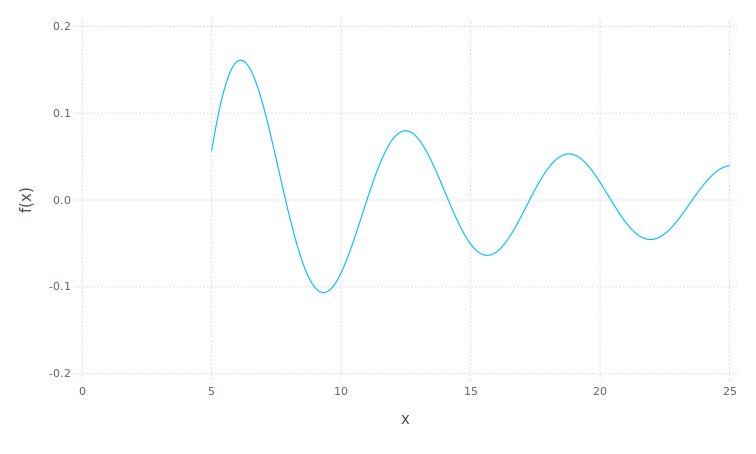

In [114]:
using Gadfly
pl=plot([x-> cos(x)/x], 5, 25)

In [71]:
# zapis do pliku
draw(PNG("gadfly.png", 300, 100), pl)

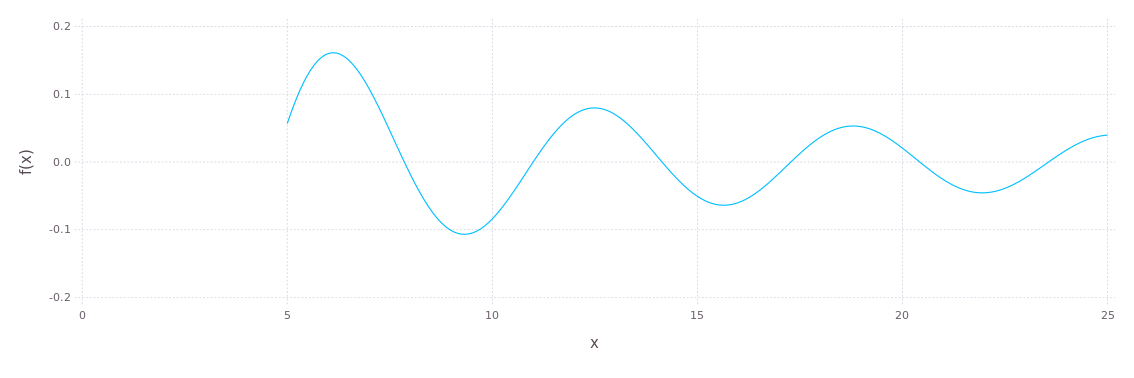

In [115]:
using Images
using FileIO
img = load("gadfly.png")

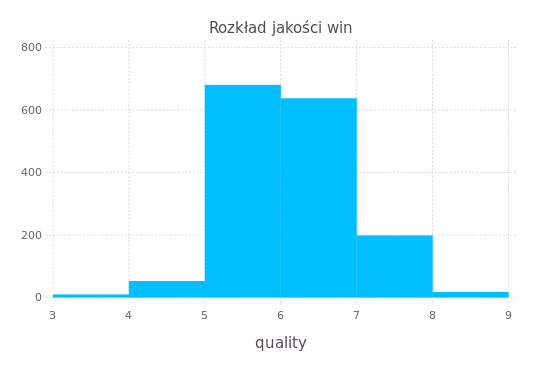

In [73]:
# histogram jakości wina
plot(mydata, x="quality" , Geom.histogram, Guide.title("Rozkład jakości win"))

In [74]:
using Gadfly, DataFrames
df4=readtable("medical.csv")
print("size is ", size(df4))
df4[1:3, 1:size(df4,2)]

size is (50,7)

,Numer,Płeć,Wiek,sBP,dBP,Drink,BMI
1,0,1,39,106.0,70.0,0,26.97
2,1,2,46,121.0,81.0,0,28.73
3,2,1,48,127.5,80.0,1,25.34


In [75]:
df4[:Płeć]= ifelse(df4[:Płeć].==1, "M", "K")
df4[:Drink]= ifelse(df4[:Drink].==1, "T", "N")
df4[1:3, 1:size(df4,2)]


,Numer,Płeć,Wiek,sBP,dBP,Drink,BMI
1,0,M,39,106.0,70.0,N,26.97
2,1,K,46,121.0,81.0,N,28.73
3,2,M,48,127.5,80.0,T,25.34


In [76]:
describe(df4)

Numer
Min      0.0
1st Qu.  12.25
Median   24.5
Mean     24.5
3rd Qu.  36.75
Max      49.0
NAs      0
NA%      0.0%

Płeć
Length  50
Type    String
NAs     0
NA%     0.0%
Unique  2

Wiek
Min      35.0
1st Qu.  42.0
Median   46.0
Mean     47.86
3rd Qu.  52.75
Max      65.0
NAs      0
NA%      0.0%

sBP
Min      96.0
1st Qu.  119.5
Median   131.5
Mean     133.5
3rd Qu.  145.75
Max      206.0
NAs      0
NA%      0.0%

dBP
Min      63.0
1st Qu.  76.375
Median   84.25
Mean     84.86
3rd Qu.  90.75
Max      121.0
NAs      0
NA%      0.0%

Drink
Length  50
Type    String
NAs     0
NA%     0.0%
Unique  2

BMI
Min      18.59
1st Qu.  23.25
Median   26.15
Mean     26.374200000000002
3rd Qu.  28.472499999999997
Max      40.11
NAs      0
NA%      0.0%



In [77]:
# odchylenie standardowe
std(df4[:Wiek])

8.19409942007799

In [78]:
# średnia
mean(df4[:Wiek])

47.86

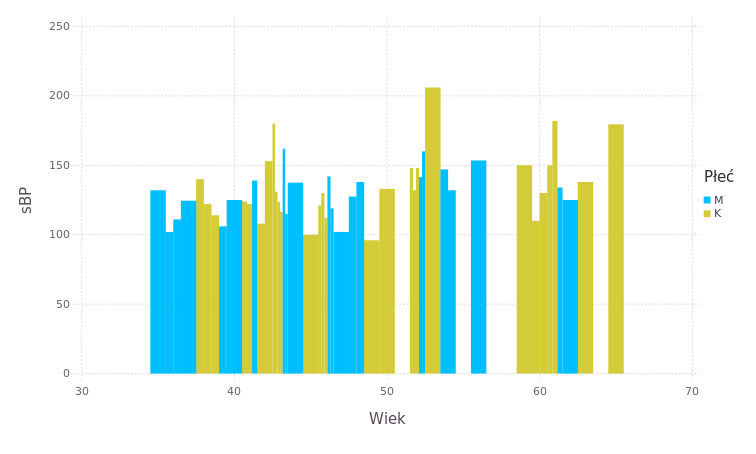

In [117]:
# wykres skórczowego ciśnienia krwi - systolic blood preassure (sBP)
# w zależności od wieku
# z podziałem wg płci
#
set_default_plot_size(20cm, 12cm)
plot(df4, x="Wiek", y="sBP", color="Płeć", Geom.bar(position=:dodge))


### Pakiet RDatasets
- dostęp do kolekcji zbiorów danych do celów uczenia się, naukowych oraz rozwoju narzędzi do statystyki
- kolekcja z języka R udostępniona szerzej
- https://github.com/vincentarelbundock/Rdatasets
- lista pakietów on line  http://vincentarelbundock.github.io/Rdatasets/datasets.html

In [80]:
# lista pakietów 
using RDatasets
RDatasets.datasets()

,Package,Dataset,Title,Rows,Columns
1,COUNT,affairs,affairs,601,18
2,COUNT,azdrg112,azdrg112,1798,4
3,COUNT,azpro,azpro,3589,6
4,COUNT,badhealth,badhealth,1127,3
5,COUNT,fasttrakg,fasttrakg,15,9
6,COUNT,lbw,lbw,189,10
7,COUNT,lbwgrp,lbwgrp,6,7
8,COUNT,loomis,loomis,410,11
9,COUNT,mdvis,mdvis,2227,13
10,COUNT,medpar,medpar,1495,10


In [108]:
# zbiór danych o wymiarach irysów http://vincentarelbundock.github.io/Rdatasets/doc/datasets/iris.html
# w formie DataFrame

iris = dataset("datasets", "iris")
DataFrames.head(iris)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


#### Przykład: analiza danych z egzaminów szkolnych

In [110]:
# dane z egzaminów
mlmf=dataset("mlmRev", "Gcsemv")
DataFrames.head(mlmf)

,School,Student,Gender,Written,Course
1,20920,16,M,23.0,NA
2,20920,25,F,NA,71.2
3,20920,27,F,39.0,76.8
4,20920,31,F,36.0,87.9
5,20920,42,M,16.0,44.4
6,20920,62,F,36.0,NA


In [83]:
summary(mlmf)

"1905×5 DataFrames.DataFrame"

In [84]:
# dane z konkretnej szkoły
mlmf[mlmf[:School].=="68207", :]

,School,Student,Gender,Written,Course
1,68207,7,F,32.0,58.3
2,68207,84,F,25.0,41.6
3,68207,101,F,23.0,62.9
4,68207,126,F,26.0,57.4
5,68207,167,M,NA,50.0


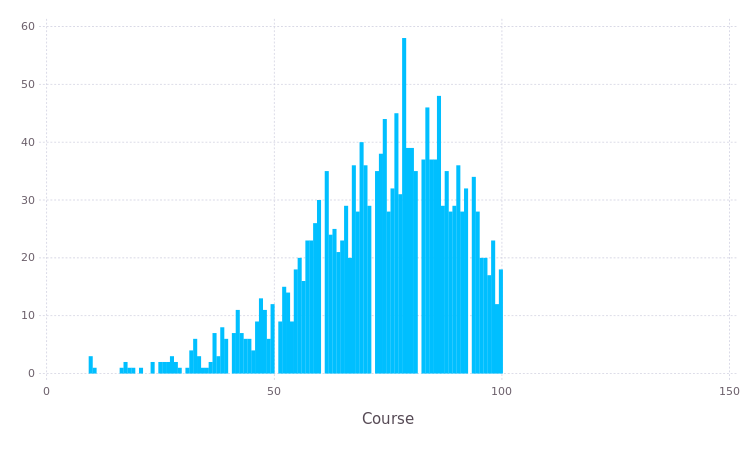

In [85]:
# histogram ocen z kursu
plot(mlmf,x="Course" ,Geom.histogram)
   

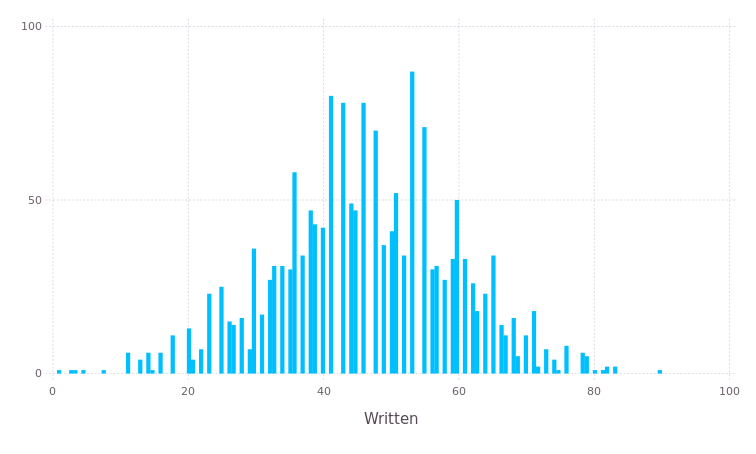

In [86]:
# histogram ocen z egzaminu
plot(mlmf,x="Written" ,Geom.histogram)

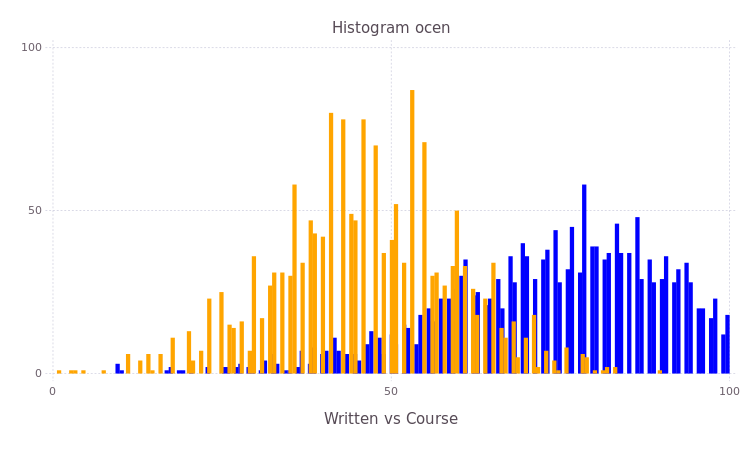

In [126]:
# na tym samym wykresie:
plot(Guide.title("Histogram ocen"),Guide.XLabel("Written vs Course"),
layer(mlmf,x="Written" ,Geom.histogram, Theme(default_color=colorant"orange")),
layer(mlmf,x="Course" ,Geom.histogram,  Theme(default_color=colorant"blue")),

        
)

In [88]:
# grupujemy wg kodu szkoły
groupby(mlmf, :School)

DataFrames.GroupedDataFrame  73 groups with keys: Symbol[:School]
First Group:
9×5 DataFrames.SubDataFrame{Array{Int64,1}}
│ Row │ School  │ Student │ Gender │ Written │ Course │
├─────┼─────────┼─────────┼────────┼─────────┼────────┤
│ 1   │ "20920" │ "16"    │ "M"    │ 23.0    │ NA     │
│ 2   │ "20920" │ "25"    │ "F"    │ NA      │ 71.2   │
│ 3   │ "20920" │ "27"    │ "F"    │ 39.0    │ 76.8   │
│ 4   │ "20920" │ "31"    │ "F"    │ 36.0    │ 87.9   │
│ 5   │ "20920" │ "42"    │ "M"    │ 16.0    │ 44.4   │
│ 6   │ "20920" │ "62"    │ "F"    │ 36.0    │ NA     │
│ 7   │ "20920" │ "101"   │ "F"    │ 49.0    │ 89.8   │
│ 8   │ "20920" │ "113"   │ "M"    │ 25.0    │ 17.5   │
│ 9   │ "20920" │ "146"   │ "M"    │ NA      │ 32.4   │
⋮
Last Group:
22×5 DataFrames.SubDataFrame{Array{Int64,1}}
│ Row │ School  │ Student │ Gender │ Written │ Course │
├─────┼─────────┼─────────┼────────┼─────────┼────────┤
│ 1   │ "84772" │ "2"     │ "F"    │ 53.0    │ NA     │
│ 2   │ "84772" │ "7"     │ "F"   

In [89]:
# Tworzenie listy wszystkich szkół z rezultatami dla co najmniej 50 studentów
# ze średnimi wynikami z egzaminu oraz średnimi ocenami z kursu
for subdf in groupby(mlmf, :School)
    (size(subdf)[1]> 50) &&
    @printf "%6s : %4d :%6.2f : %6.2f\n" subdf[:School][1] size(subdf)[1] mean(dropna(subdf[:Written])) mean(dropna(subdf[:Course])) 
end

 22520 :   65 : 35.84 :  56.45
 60457 :   54 : 53.34 :  85.61
 68107 :   79 : 44.41 :  74.19
 68137 :  104 : 28.92 :  62.62
 68321 :   52 : 52.00 :  78.64
 68411 :   84 : 40.96 :  59.21
 68809 :   73 : 42.68 :  70.98


In [118]:
# sortowanie po wynikach 
DataFrames.head(sort!(mlmf, cols=[:Written]))


,School,Student,Gender,Written,Course
1,22710,77,F,0.6,41.6
2,68137,65,F,2.5,50.0
3,22520,115,M,3.1,9.25
4,68137,80,F,4.3,50.9
5,68137,79,F,7.5,27.7
6,22710,57,F,11.0,73.1


In [91]:
#różnica pomiędzy ocenami z kursu i egzaminu
diff=dropna(mlmf[:Course]- mlmf[:Written])
mean(diff)

26.879087327642804

In [92]:
#odchylenie
std(diff)

15.547498360728744

In [93]:
#najwyższa różnica
maximum(diff)

76.0

In [94]:
#najniższa różnica
minimum(diff)

-43.5

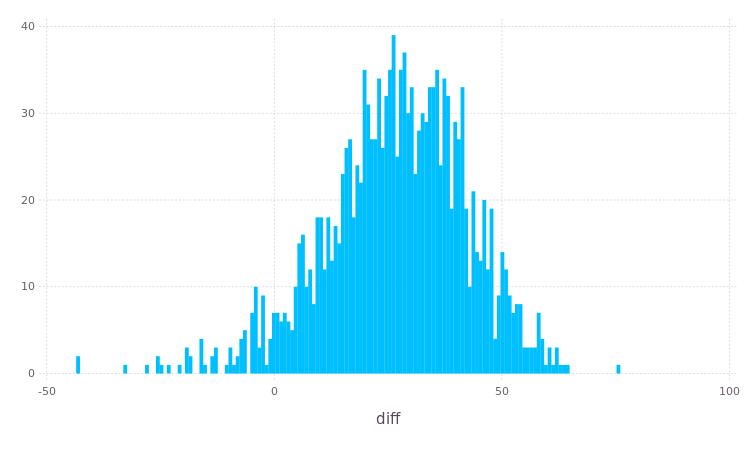

In [95]:
# wykres histogramu różnic
plot(DataFrame(diff=diff),x="diff" ,Geom.histogram)

In [96]:

hh=fit(Histogram, diff)

StatsBase.Histogram{Int64,1,Tuple{FloatRange{Float64}}}
edges:
  -50.0:10.0:80.0
weights: [2,1,6,16,53,125,251,408,361,211,78,10,1]
closed: right

In [97]:
# ile jest przypadków, że ocena z egzaminu jest wyższa niż z kursu?
sum(hh.weights[1:5])

78

In [98]:
# ile jest przypadków, że ocena z egzaminu jest niższa niż z kursu?
sum(hh.weights[6:13])

1445

In [120]:
# wybieramy przypadki bez wartości NA
df15=mlmf[completecases(mlmf[[:Written, :Course]]),:]
DataFrames.head(df15)

,School,Student,Gender,Written,Course
1,22710,77,F,0.6,41.6
2,68137,65,F,2.5,50.0
3,22520,115,M,3.1,9.25
4,68137,80,F,4.3,50.9
5,68137,79,F,7.5,27.7
6,22710,57,F,11.0,73.1


In [100]:
#czy oceny z egzaminu zależą od ocen z kursu ?
# wynik współczynnika corelacji świadczy o umiarkowanej 
# zależności dodatniej (im wyższa ocena z egzaminu, tym wyższa ocena z kursu)
cor(df15[:Written], df15[:Course])

0.4741707386424458

In [101]:
# regresja liniowa
lr=linreg(convert(Array,df15[:Written]), convert(Array,df15[:Course]))

(46.48997278026551,0.5782813698326201)

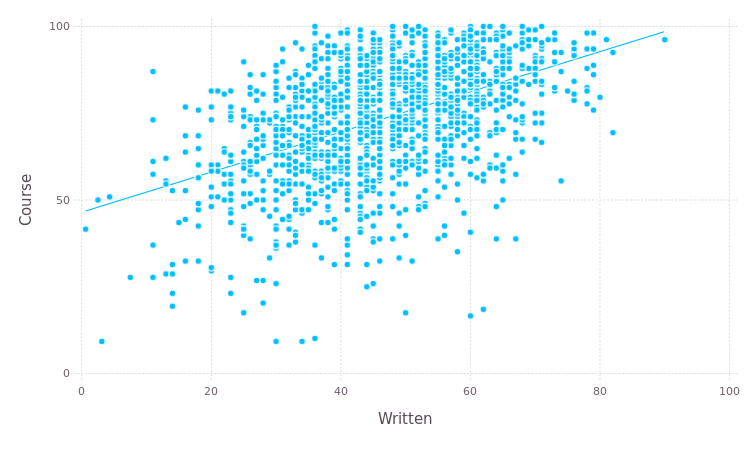

In [102]:
# wynik regresji linowej można też uzyskać  na wykresie używająć  Geom.smooth(method=:lm)

plot(df15, x="Written", y="Course",Geom.point, Geom.smooth(method=:lm))

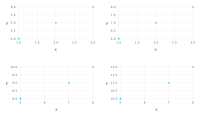

In [123]:
# układanie wykresów w "tabelki" wykresów
using Gadfly
p1 = plot(x=[1,2,3], y=[4,5,6])
p2 = plot(x=[1,2,3], y=[6,7,8])
vstack(p1,p2)

p3 = plot(x=[5,7,8], y=[8,9,10])
p4 = plot(x=[5,7,8], y=[10,11,12])

# to jest to samo
vstack(hstack(p1,p2),hstack(p3,p4))
gridstack([p1 p2; p3 p4])



####  Inne pakiety do wizualizacji:

- TextPlots - prosta wizualizacja tekstowa
- Windston - 2D podobny do wbudowanej wizualizacji Matlaba
- PyPlot - interfejs do Pythonowej biblioteki matplotlib 





####  Julia oferuje zaawansowane pakiety do analizy danych: 

- JuliaDB – Various database drivers for Julia
- JuliaImages - Image Processing
- JuliaML - Machine Learning
- JuliaStats – Statistics

http://pkg.julialang.org/




### Przykład z użyciem równań różniczkowych zwyczajnych

```julia
Pkg.add("DifferentialEquations")
```
http://docs.juliadiffeq.org/stable/

Przykład z równaniem rozpadu promieniotwórczego
http://mathworld.wolfram.com/ExponentialDecay.html

In [10]:
# równanie rozpadu promieniotwórczego

using DifferentialEquations

f = @ode_def Rozpad123 begin
  dx = - λ*x
end λ=>1.5 

u0 = [8.0]

tspan = (0.0,10.0)

prob = ODEProblem(f,u0,tspan)

sol = solve(prob, RK4(), dt=0.01)


DiffEqBase.ODESolution{Array{Array{Float64,1},1},Void,Void,Array{Float64,1},Array{Array{Array{Float64,1},1},1},DiffEqBase.ODEProblem{Array{Float64,1},Float64,true,Rozpad123,DiffEqBase.CallbackSet{Tuple{},Tuple{}}},OrdinaryDiffEq.RK4,OrdinaryDiffEq.InterpolationData{Rozpad123,Array{Array{Float64,1},1},Array{Float64,1},Array{Array{Array{Float64,1},1},1},OrdinaryDiffEq.RK4Cache{Array{Float64,1},Array{Float64,1}}}}(Array{Float64,1}[[8.0],[7.8809],[7.76356],[7.64798],[7.53412],[7.42195],[7.31145],[7.2026],[7.09536],[6.98973]  …  [2.75923e-6],[2.71815e-6],[2.67768e-6],[2.63782e-6],[2.59855e-6],[2.55986e-6],[2.52175e-6],[2.4842e-6],[2.44722e-6],[2.44722e-6]],nothing,nothing,[0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09  …  9.92,9.93,9.94,9.95,9.96,9.97,9.98,9.99,10.0,10.0],Array{Array{Float64,1},1}[Array{Float64,1}[[0.0]],Array{Float64,1}[[-12.0],[-11.8213]],Array{Float64,1}[[-11.8213],[-11.6453]],Array{Float64,1}[[-11.6453],[-11.472]],Array{Float64,1}[[-11.472],[-11.3012]],Array{Float64,

In [8]:
fieldnames(sol)

11-element Array{Symbol,1}:
 :u         
 :u_analytic
 :errors    
 :t         
 :k         
 :prob      
 :alg       
 :interp    
 :dense     
 :tslocation
 :retcode   

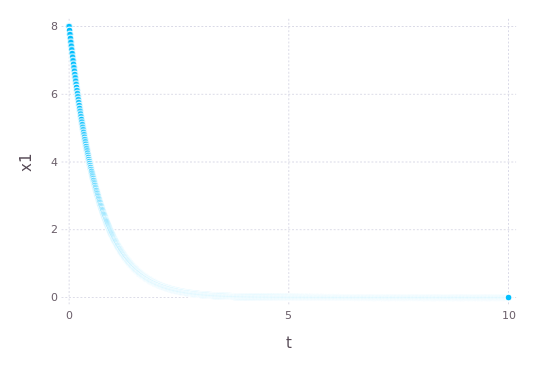

In [11]:
using Gadfly
using DataFrames

df17=DataFrame(t=sol.t, x1=map(x->x[1],sol.u))

plot(df17,  x="t", y="x1")

